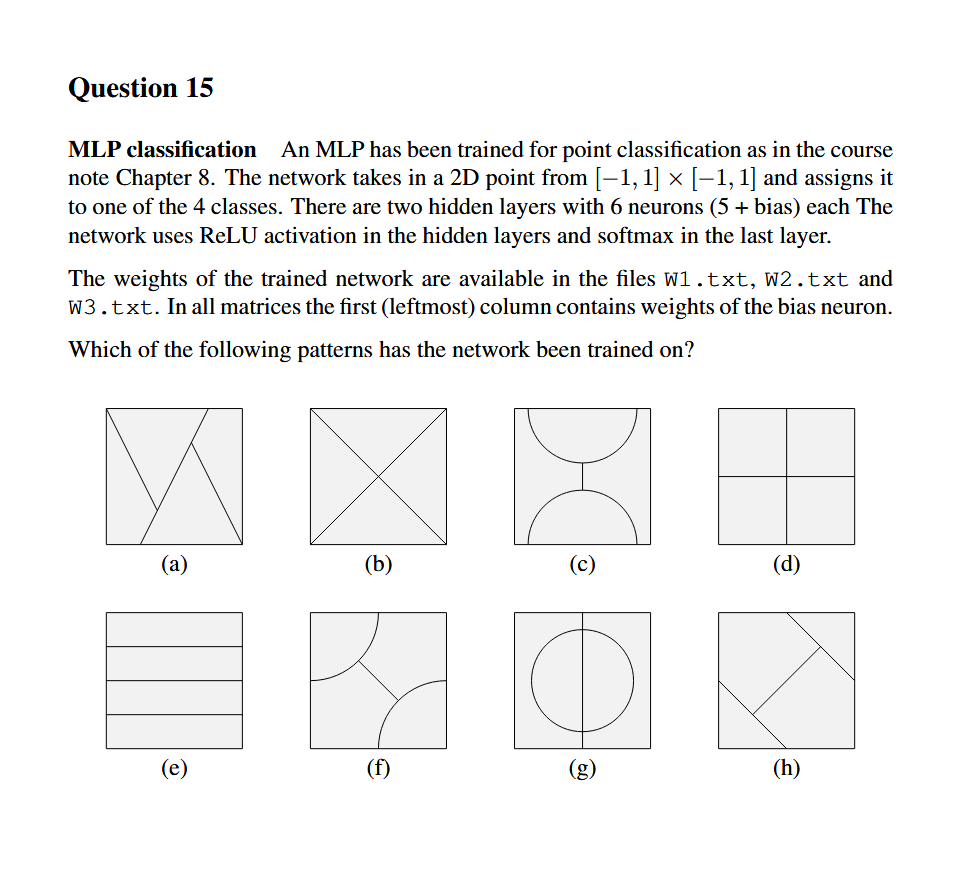

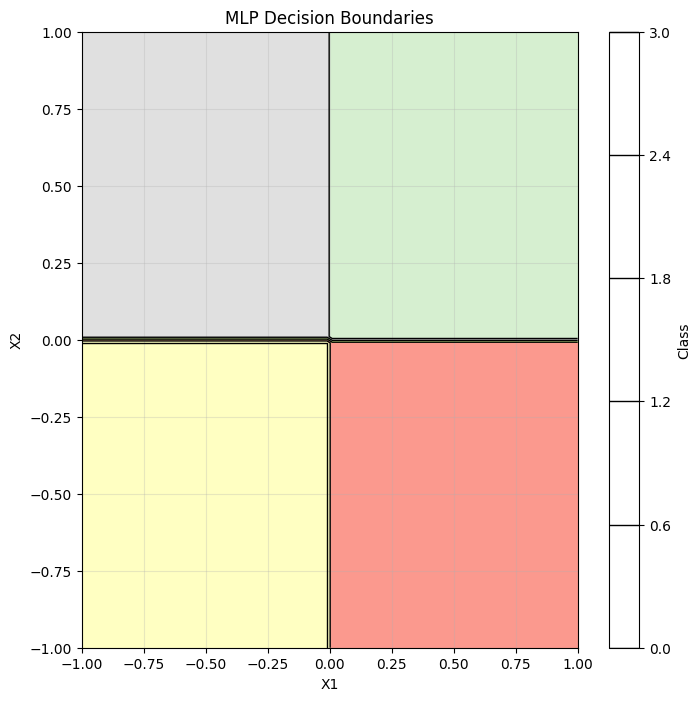

Compare the generated plot with patterns (a) through (h)
The pattern that matches your visualization is the answer!


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def softmax(x):
    """Softmax activation function"""
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def load_weights(w1_file, w2_file, w3_file):
    """Load weight matrices from files"""
    W1 = np.loadtxt(w1_file)  # Shape: (6, 3) - 6 neurons, 2 inputs + 1 bias
    W2 = np.loadtxt(w2_file)  # Shape: (6, 7) - 6 neurons, 6 inputs + 1 bias  
    W3 = np.loadtxt(w3_file)  # Shape: (4, 7) - 4 outputs, 6 inputs + 1 bias
    return W1, W2, W3

def forward_pass(X, W1, W2, W3):
    """
    Forward pass through the MLP
    X: input points (n_points, 2)
    W1: (3, 5) - input (2 + bias) to hidden1 (5 neurons)
    W2: (6, 5) - hidden1 (5 + bias) to hidden2 (5 neurons) 
    W3: (6, 4) - hidden2 (5 + bias) to output (4 classes)
    Returns: class probabilities (n_points, 4)
    """
    # Add bias term (column of 1s) to input
    X_bias = np.column_stack([np.ones(X.shape[0]), X])  # (n_points, 3)
    
    # First hidden layer: (n_points, 3) @ (3, 5) → (n_points, 5)
    z1 = X_bias @ W1  # (n_points, 5)
    a1 = relu(z1)     # (n_points, 5)
    
    # Add bias term to first hidden layer output
    a1_bias = np.column_stack([np.ones(a1.shape[0]), a1])  # (n_points, 6)
    
    # Second hidden layer: (n_points, 6) @ (6, 5) → (n_points, 5)
    z2 = a1_bias @ W2  # (n_points, 5)
    a2 = relu(z2)      # (n_points, 5)
    
    # Add bias term to second hidden layer output
    a2_bias = np.column_stack([np.ones(a2.shape[0]), a2])  # (n_points, 6)
    
    # Output layer: (n_points, 6) @ (6, 4) → (n_points, 4)
    z3 = a2_bias @ W3  # (n_points, 4)
    output = softmax(z3)  # (n_points, 4)
    
    return output

def analyze_decision_boundaries(W1, W2, W3, resolution=100):
    """
    Analyze decision boundaries by evaluating network on a grid
    """
    # Create grid of points in [-1, 1] x [-1, 1]
    x = np.linspace(-1, 1, resolution)
    y = np.linspace(-1, 1, resolution)
    X, Y = np.meshgrid(x, y)
    
    # Flatten grid for processing
    grid_points = np.column_stack([X.ravel(), Y.ravel()])
    
    # Get predictions
    predictions = forward_pass(grid_points, W1, W2, W3)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Reshape back to grid
    class_grid = predicted_classes.reshape(X.shape)
    
    return X, Y, class_grid

def visualize_decision_boundaries(X, Y, class_grid):
    """
    Visualize the decision boundaries
    """
    plt.figure(figsize=(8, 8))
    plt.contourf(X, Y, class_grid, levels=4, alpha=0.8, cmap='Set3')
    plt.contour(X, Y, class_grid, levels=4, colors='black', linewidths=1)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('MLP Decision Boundaries')
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class')
    plt.show()

# Main analysis function
def analyze_mlp_pattern():
    """
    Main function to analyze the MLP and determine which pattern it learned
    """
    # Load the weight matrices
    # Note: You need to provide the actual weight files
    try:
        W1, W2, W3 = load_weights('data/W1.txt', 'data/W2.txt', 'data/W3.txt')
        
        # Analyze decision boundaries
        X, Y, class_grid = analyze_decision_boundaries(W1, W2, W3)
        
        # Visualize
        visualize_decision_boundaries(X, Y, class_grid)
        
        print("Compare the generated plot with patterns (a) through (h)")
        print("The pattern that matches your visualization is the answer!")
        
    except FileNotFoundError:
        print("Weight files not found. Please ensure W1.txt, W2.txt, and W3.txt are available.")
        print("Without the actual weights, I cannot determine which pattern the network learned.")

# Run the analysis
if __name__ == "__main__":
    analyze_mlp_pattern()

# Alternative: If you want to test with sample data, you can create random weights
def test_with_random_weights():
    """
    Test the pipeline with random weights (for demonstration)
    """
    # Create random weights for testing
    W1 = np.random.randn(6, 3) * 0.5  # 6 neurons, 2 inputs + bias
    W2 = np.random.randn(6, 7) * 0.5  # 6 neurons, 6 inputs + bias
    W3 = np.random.randn(4, 7) * 0.5  # 4 outputs, 6 inputs + bias
    
    # Analyze decision boundaries
    X, Y, class_grid = analyze_decision_boundaries(W1, W2, W3)
    
    # Visualize
    visualize_decision_boundaries(X, Y, class_grid)
    
# Uncomment to test with random weights:
# test_with_random_weights()

Question 15: d


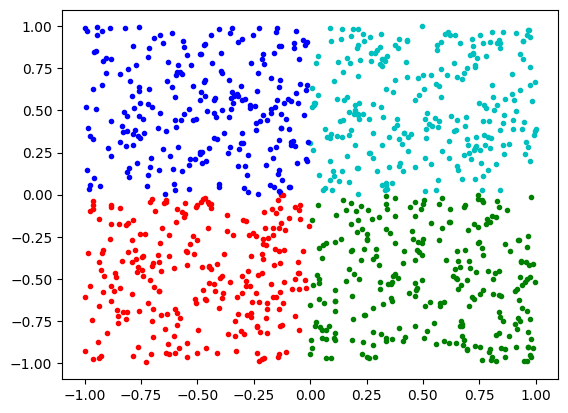

: 

In [ ]:
#%% Question 15 - MLP classification
# Answer (d)
W1 = np.loadtxt('data/W1.txt')
W2 = np.loadtxt('data/W2.txt')
W3 = np.loadtxt('data/W3.txt')

def mlp(x):
    h1 = np.maximum(np.concatenate(([1], x)) @ W1, 0)
    h2 = np.maximum(np.concatenate(([1], h1)) @ W2, 0)
    y_hat = np.concatenate(([1], h2)) @ W3
    y = np.exp(y_hat)
    y = y/y.sum()
    return np.argmax(y)
    
colors = 'rgbc'
fig, ax = plt.subplots()
for i in range(1000):
    x = np.random.uniform(low=-1, high=1, size=2)
    y = mlp(x)
    ax.plot(x[0], x[1], '.'+colors[y])
print('Question 15: d')